<h1 style="color:orange"> <u>Heart failure dataset - Entrega del Proyecto Final</u> </h1>

**INTEGRANTES**: Valentina Sarmiento,
             Maximiliano Castelli,
             Maximiliano Zeballos,
             Matias Vargas<br>

**INSTITUCION: CODERHOUSE**.

**FECHA DE PRESENTACION: 25/02/2022**

**FUENTES**: https://www.kaggle.com/fedesoriano/heart-failure-prediction <br>

### DESCRIPCIÓN DE LOS DATOS  (_Attribute Information_)

1. **Age**: *age of the patient* - [years] [28/77]<br>
2. **Sex**: *sex of the patient* - [M: Male, F: Female]<br>Asymptomatic
3. **ChestPainType**: *chest pain type* - [TA: Typical} Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]<br>
4. **RestingBP**: *resting blood pressure* - [mm Hg]<br>
5. **Cholesterol**: *serum cholesterol* - [mm/dl] [125/200] <<< Normal values<br>
6. **FastingBS**: *fasting blood sugar* - [1: if FastingBS > 120 mg/dl, 0: otherwise]<br>
7. **RestingECG**: *resting electrocardiogram results* - [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]<br>
8. **MaxHR**: *maximum heart rate achieved* - [Numeric value between 60 and 202]<br>
9. **ExerciseAngina**: *exercise-induced angina* - [Y: Yes, N: No]<br>
10. **Oldpeak**: *oldpeak = ST* - [Numeric value measured in depression] [OldPeak<1.5 LowRisk / 1.5-4.2 Risk / >4.2 Terrible ]<br>
11. **ST_Slope**: *the slope of the peak exercise ST segment* - [Up: upsloping, Flat: flat, Down: downsloping]<br>
12. **HeartDisease**: *output class* - [1: heart disease, 0: Normal]<br>

**CONTEXTO SITUACIONAL**


Las enfermedades cardiovasculares (ECV) son la causa número uno de muerte a escala global, afectando 17.9 millones de vidas por año (31% de las muertes a nivel global).
Con el fin de mejorar la detección temprana de la enfermedad y proveer la mejor atención de pacientes, se preparó un dataset con datos obtenidos de pacientes al entrar a la guardia y al área de cardiología de distintas ciudades.

**PROBLEMA A RESOLVER**

El problema a resolver es seleccionar el mejor modelo de clasificación e identificar con exactitud que probabilidad hay de que los pacientes sean propicios a tener enfermedades cardíacas.

In [1]:
# IMPORTACION DE LIBRERIAS A UTILIZAR:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# CARGA DEL DATASET:

data = pd.read_csv("heart.csv",sep = ',')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# METRICAS BÁSICAS
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**HALLAZGOS ENCONTRADOS POR EL EDA**




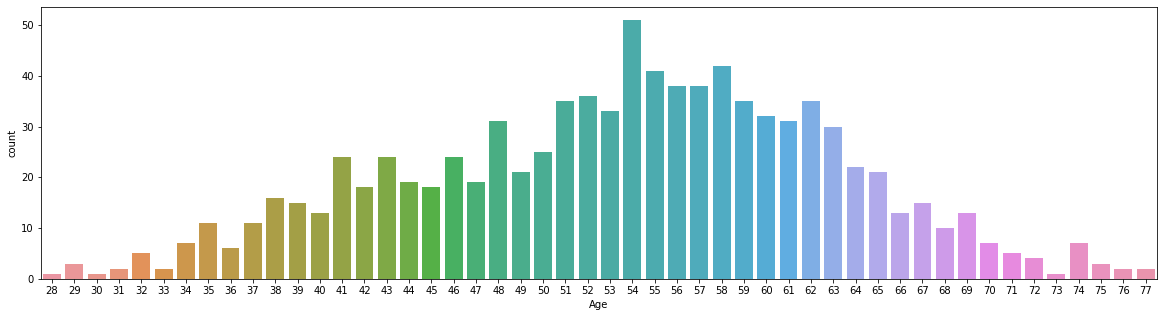

In [4]:
# DISTRIBUCIÓN DE LA EDAD:
edad_dist = (20, 5)
edad_dist, ax2 = plt.subplots(figsize=edad_dist)
ax2 = sns.countplot(x=data['Age'])

La edad en el dataset va de 28 a 77, siendo el grupo de 50 a 60 el rango etáreo que más cantidad de personas contiene.

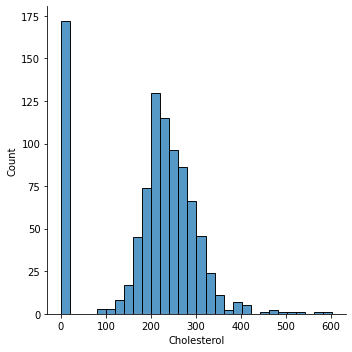

In [5]:
# DISTRIBUCION DEL COLESTEROL: 

sns.displot(x=data['Cholesterol'], bins=30)

Se ve que hay muchisimos registros con valor igual a 0 para ésta variable. Habria que analizar si hay pacientes
    con colesterol igual a 0, o si es un error del dataset

In [6]:
# CANTIDAD DE PERSONAS QUE PRESENTAN COLESTEROL 0
colesterol_0 = data[data['Cholesterol']==0]
print(" La cantidad de pacientes que presentan niveles de colesterol 0 son: ",colesterol_0.Cholesterol.count())

 La cantidad de pacientes que presentan niveles de colesterol 0 son:  172


<h2 style="color:orange"> <u>Encoding de variables categóricas</u> </h2>

In [7]:
#CREAMOS UNA COPIA DEL DATASET ORIGINAL
rawdata = data.copy()

In [8]:
data['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [9]:
data['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [10]:
data['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

**Paso 1:** Generamos las variables dummy de las columnas Chestpain, RestingECG y ST_Slope, con la finalidad de que cada categoría tenga sus valores binarios 0 y 1.

In [11]:
chestpain_dummy =pd.get_dummies(data['ChestPainType'], prefix = 'ChestPainType', drop_first = True)
restingecg_dummy =pd.get_dummies(data['RestingECG'], prefix = 'RestingECG', drop_first = True)
ST_Slope_dummy =pd.get_dummies(data['ST_Slope'], prefix = 'ST_Slope', drop_first = True)
ExerciseAngina_dummy=pd.get_dummies(data['ExerciseAngina'], prefix = 'ExerciseA', drop_first = True)
Sex_dummy =pd.get_dummies(data['Sex'], prefix = 'Sex', drop_first = True)

**Paso 2:** Agregamos estas nuevas columnas con valores binarios a nuestro dataset.

In [12]:
data = pd.concat([data, chestpain_dummy], axis = 1)
data = pd.concat([data, restingecg_dummy], axis = 1)
data = pd.concat([data, ST_Slope_dummy], axis = 1)
data = pd.concat([data, ExerciseAngina_dummy], axis = 1)
data = pd.concat([data, Sex_dummy], axis = 1)


**Paso 3:** Eliminamos las columnas Chestpain, RestingECG y ST_Slope de nuestro dataset para quedarnos solamente con las variables dummies.

In [13]:
data = data.drop(["ChestPainType",'RestingECG','ST_Slope', 'Sex', 'ExerciseAngina'], axis = 1)

Reemplazamos aquellas variables cuyas categorías de por sí, **ya sean binarias**, como lo son en nuestro caso, ExerciseAngina y Sex

In [14]:
data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up,ExerciseA_Y,Sex_M
0,40,140,289,0,172,0.0,0,1,0,0,1,0,0,1,0,1
1,49,160,180,0,156,1.0,1,0,1,0,1,0,1,0,0,0
2,37,130,283,0,98,0.0,0,1,0,0,0,1,0,1,0,1
3,48,138,214,0,108,1.5,1,0,0,0,1,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,0,1,1,0,1,0,0,1
914,68,144,193,1,141,3.4,1,0,0,0,1,0,1,0,0,1
915,57,130,131,0,115,1.2,1,0,0,0,1,0,1,0,1,1
916,57,130,236,0,174,0.0,1,1,0,0,0,0,1,0,0,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   ChestPainType_ATA  918 non-null    uint8  
 8   ChestPainType_NAP  918 non-null    uint8  
 9   ChestPainType_TA   918 non-null    uint8  
 10  RestingECG_Normal  918 non-null    uint8  
 11  RestingECG_ST      918 non-null    uint8  
 12  ST_Slope_Flat      918 non-null    uint8  
 13  ST_Slope_Up        918 non-null    uint8  
 14  ExerciseA_Y        918 non-null    uint8  
 15  Sex_M              918 non-null    uint8  
dtypes: float64(1), int64(6), u

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0
ChestPainType_ATA,918.0,0.188453,0.391287,0.0,0.00,0.0,0.0,1.0
ChestPainType_NAP,918.0,0.221133,0.415236,0.0,0.00,0.0,0.0,1.0
ChestPainType_TA,918.0,0.050109,0.218289,0.0,0.00,0.0,0.0,1.0


<h2 style="color:orange"> <u>Tratamiento de outliers</u> </h2>

En cuanto a los outliers, observamos que los mismos existen, utilizando boxplots:
- En el caso de __RestingBP__, los outliers detectables son valores posibles de acontecer, excepto el caso donde tiene como valor 0, el cual decidimos debe ser cambiado por el promedio.
- En el caso de __Cholesterol__, decidimos eliminar también aquellos outliers cuyo valor es 0, ya que todo el mundo, aunque sea mínimo, tiene colesterol.


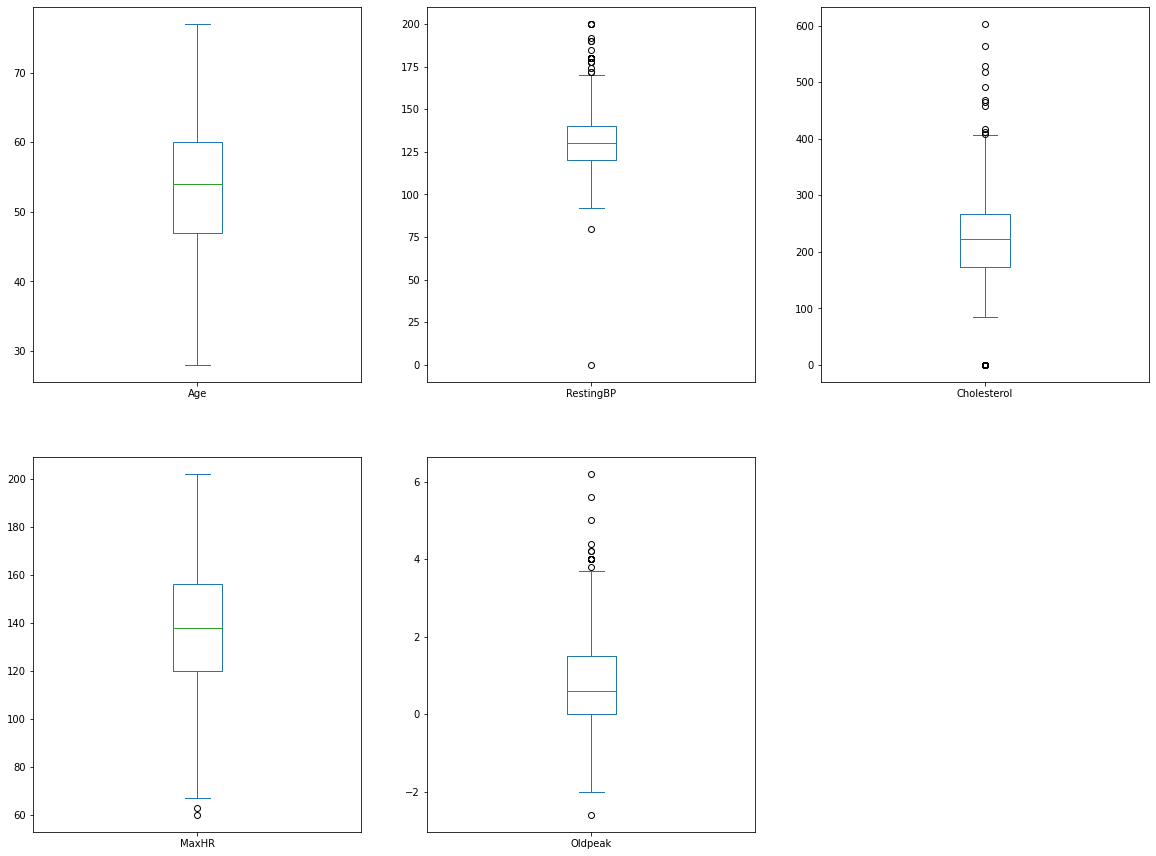

In [17]:
data[["Age","RestingBP","Cholesterol","MaxHR","Oldpeak" ]].plot(kind="box", subplots=True, layout=(5, 3), figsize=(20,40))
plt.show()

<br>
<br>
Reemplazamos por la media:

In [18]:
data["RestingBP"]=data["RestingBP"].replace(0,data["RestingBP"].mean())

In [19]:
data["Cholesterol"]=data["Cholesterol"].replace(0,data["Cholesterol"].mean())

In [20]:
data["MaxHR"]=data["MaxHR"].replace(0,data["MaxHR"].mean())

<br>
<br>
Graficamos nuevamente los boxplots:

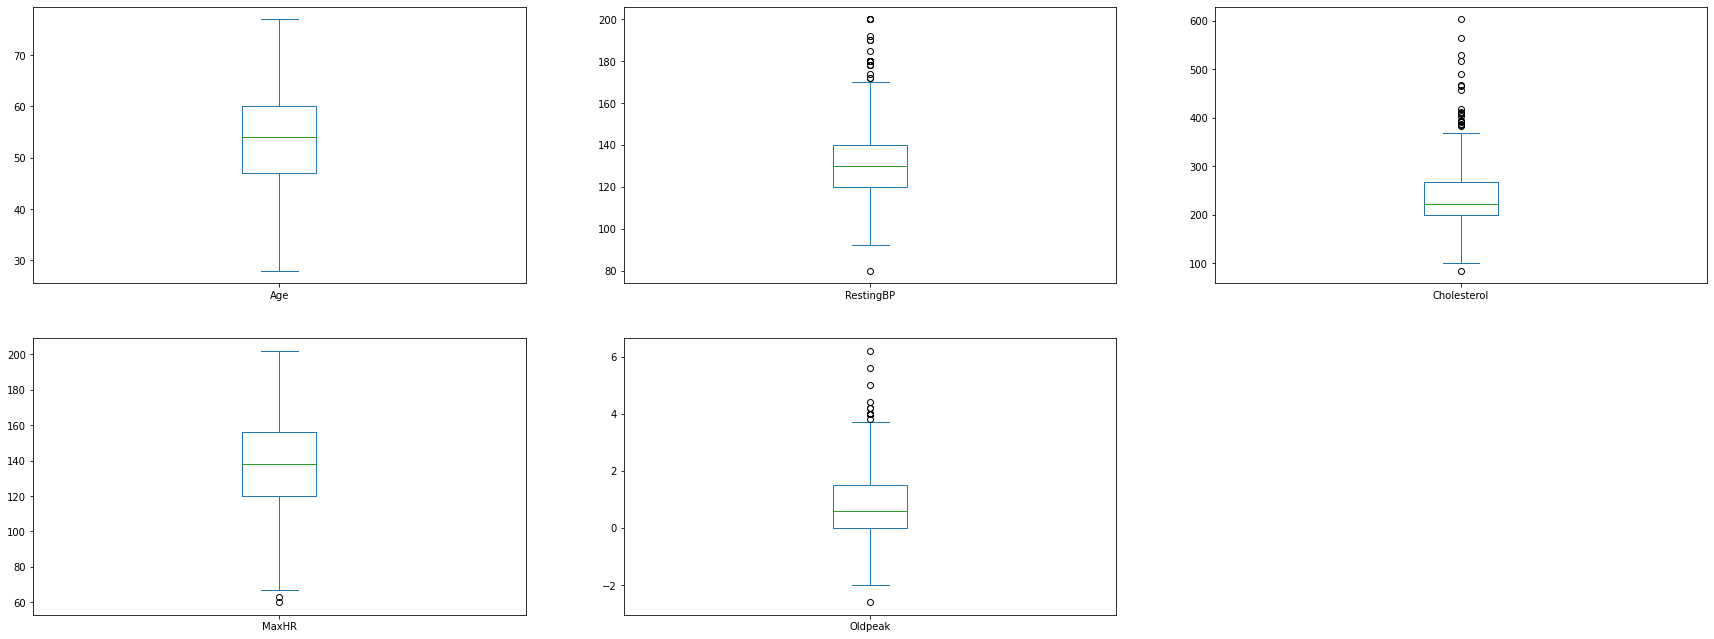

In [21]:
data[["Age","RestingBP","Cholesterol","MaxHR","Oldpeak" ]].plot(kind="box", subplots=True, layout=(10, 3), figsize=(30,60))
plt.show()

<br>
<br>
Podemos ver que se han reemplazado los valores iguales a 0 para la variable "Cholesterol":

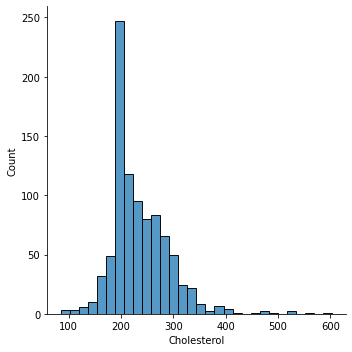

In [22]:
sns.displot(x=data['Cholesterol'], bins=30)

- ### NO SE OBSERVAN NANS 

In [23]:
#Dataset original
rawdata.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [24]:
#Dataset procesado
data.isna().sum()

Age                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
Oldpeak              0
HeartDisease         0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_Normal    0
RestingECG_ST        0
ST_Slope_Flat        0
ST_Slope_Up          0
ExerciseA_Y          0
Sex_M                0
dtype: int64

<h2 style="color:orange"> <u>Correlaciones</u> </h2>

In [25]:
data.corr().unstack().sort_values().drop_duplicates()

ST_Slope_Up        ST_Slope_Flat   -0.870951
HeartDisease       ST_Slope_Up     -0.622164
RestingECG_Normal  RestingECG_ST   -0.602314
ST_Slope_Up        ExerciseA_Y     -0.455676
Oldpeak            ST_Slope_Up     -0.450577
                                      ...   
HeartDisease       Oldpeak          0.403951
ExerciseA_Y        Oldpeak          0.408752
                   HeartDisease     0.494282
ST_Slope_Flat      HeartDisease     0.554134
Age                Age              1.000000
Length: 121, dtype: float64

<br>
<br>
<i><b>Conclusión:</b>
Las mejores relaciones que se pueden ver son:

- Age &    MaxHR:    -0.382045

- Age        &   Oldpeak:         0.258612
    
-  Age   &    RestingBP :         0.254399

- Cholesterol  & FastingBS  :    -0.260974

- HeartDisease & FastingBS  :     0.267291

- HeartDisease & Age     :       0.282039
              
- HeartDisease   &   Oldpeak :   0.403951

- HeartDisease & MaxHR     :     -0.400421    

Preferimos las > +-0.4 pero tomamos hasta > +/0.25 como interesantes para probar.</i>


<h2 style="color:orange"> <u>Relación de las variables con la target</u> </h2>

#### __¿Cómo se relaciona la edad con la enfermedad cardíaca?__

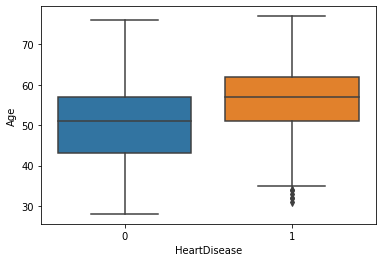

In [26]:
sns.boxplot(y=data['Age'], x=data['HeartDisease'])

___Conclusión:__ La media de edad de las personas con enfermedad cardíaca es mayor a la de las personas sanas._
<br>
<br>

#### __¿Cómo se relaciona la máxima frecuencia cardíaca alcanzada con la enfermedad cardíaca?__

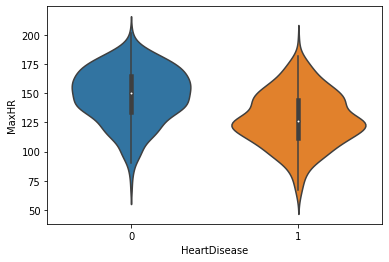

In [27]:
sns.violinplot(x=data['HeartDisease'], y=data['MaxHR'])

___Conclusión:__ La gente sana tiene una media de MAXHR mas alta que los que si tienen enfermedad cardíaca._
<br>
<br>

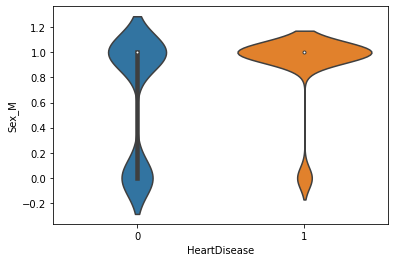

In [28]:
sns.violinplot(x=data['HeartDisease'], y=data['Sex_M'])

___Conclusión:__ El sexo masculino es el que mas cantidad de casos con enfermedad cardíaca tiene._
<br>
<br>

#### __¿Cómo se relaciona el sexo con la enfermedad cardíaca?__

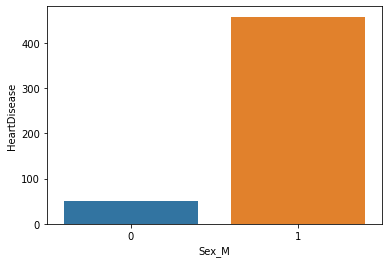

In [29]:
cat = data[["Sex_M", "HeartDisease"]].groupby(['Sex_M'], as_index=False).sum().sort_values(by='HeartDisease', ascending=False)
cat
sns.barplot(x='Sex_M', y='HeartDisease', data=cat)

___Conclusión:__ Hay mas casos de Heart Disease en hombres que en mujeres_
<br>
<br>

#### __¿Cómo se relaciona la variable RestingBP con la enfermedad cardíaca?__

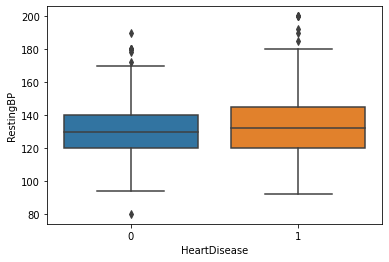

In [30]:
sns.boxplot(x=data['HeartDisease'], y=data['RestingBP'])

___Conclusión:__ A priori, no parece haber una relación._
<br>
<br>

#### __¿Cómo se relaciona la variable Cholesterol con la enfermedad cardíaca?__

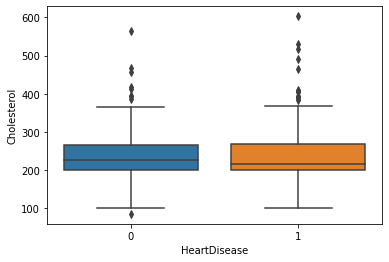

In [31]:
sns.boxplot(x=data['HeartDisease'], y=data['Cholesterol'])

___Conclusión:__ A priori, no parece haber una relación._
<br>
<br>

#### __¿Cómo se relaciona la variable FastingBS con la enfermedad cardíaca?__

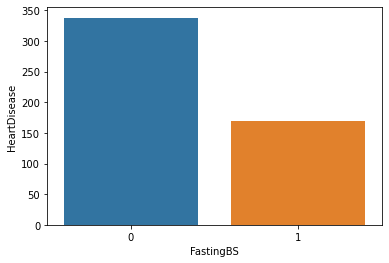

In [32]:
cat3 = rawdata[["FastingBS", "HeartDisease"]].groupby(['FastingBS'], as_index=False).sum().sort_values(by='HeartDisease', ascending=False)
cat3
sns.barplot(x='FastingBS', y='HeartDisease', data=cat3)

___Conclusión:__ Las personas con enfermedad cardíaca tienden a tener FastingBS > 120 mg/dl_ <br>
**FastingBS**: *fasting blood sugar* - [1: if FastingBS > 120 mg/dl, 0: otherwise]
<br>
<br>

#### __¿Cómo se relaciona la variable Oldpeak con la enfermedad cardíaca?__

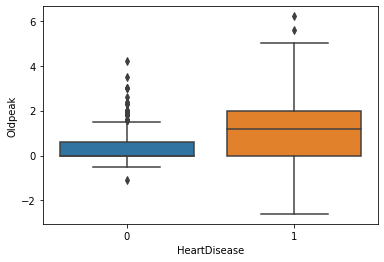

In [33]:
sns.boxplot(x=data['HeartDisease'], y=data['Oldpeak'])

___Conclusión:__ El grupo con enfermedad cardíaca tiene un rango de valores de Oldpeak mucho más amplio que el grupo sano. El grupo sano tiende a valores de oldpeak cercanos a cero._
<br>
<br>

#### __¿Cómo se relaciona la variable ChestPainType con la enfermedad cardíaca?__

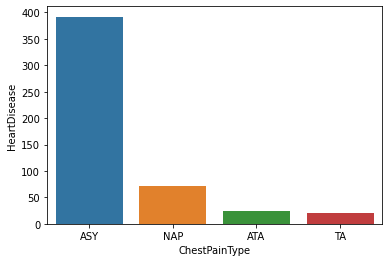

In [34]:
#sns.boxplot(x=rawdata['HeartDisease'], y=rawdata['ChestPainType'])
#sns.barplot(x='ChestPainType', y='HeartDisease', data=rawdata)

#Utilizamos el dataset original, ya que este no tiene encoding
cat2 = rawdata[["ChestPainType", "HeartDisease"]].groupby(['ChestPainType'], as_index=False).sum().sort_values(by='HeartDisease', ascending=False)
cat2
sns.barplot(x='ChestPainType', y='HeartDisease', data=cat2)

___Conclusión:__ En el grupo de personas con enfermedad cardíaca, es mayor el grupo asintomático de ChestPainType_
<br>
<br>

#### __¿Cómo se relaciona la variable RestingECG con la enfermedad cardíaca?__

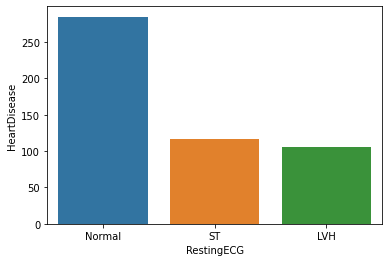

In [35]:
#Utilizamos el dataset original, ya que este no tiene encoding
cat4 = rawdata[["RestingECG", "HeartDisease"]].groupby(['RestingECG'], as_index=False).sum().sort_values(by='HeartDisease', ascending=False)
cat4
sns.barplot(x='RestingECG', y='HeartDisease', data=cat4)

___Conclusión:__ En el grupo de personas con enfermedad cardíaca, es mayor la cantidad que tiene un ECG normal que los grupos que no no_
<br>
<br>

#### __¿Cómo se relaciona la variable ST_Slope con la enfermedad cardíaca?__

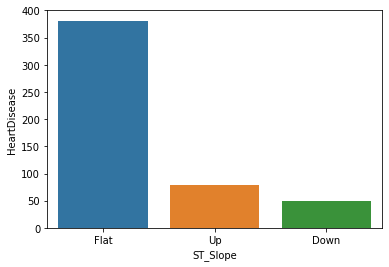

In [36]:
#Utilizamos el dataset original, ya que este no tiene encoding
cat5 = rawdata[["ST_Slope", "HeartDisease"]].groupby(['ST_Slope'], as_index=False).sum().sort_values(by='HeartDisease', ascending=False)
cat5
sns.barplot(x='ST_Slope', y='HeartDisease', data=cat5)

___Conclusión:__ En el grupo de personas con enfermedad cardíaca, es mayor el grupo que tiene una pendiente del segmento ST plana que los que tienen inclinación_
<br>
<br>

#### __¿Cómo se relaciona la variable ExerciseAngina con la enfermedad cardíaca?__

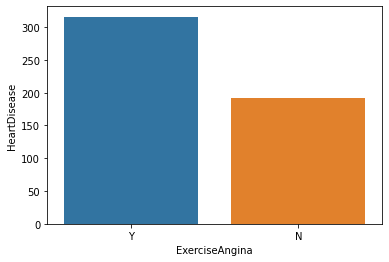

In [37]:
#Utilizamos el dataset original, ya que este no tiene encoding
cat6 = rawdata[["ExerciseAngina", "HeartDisease"]].groupby(['ExerciseAngina'], as_index=False).sum().sort_values(by='HeartDisease', ascending=False)
cat6
sns.barplot(x='ExerciseAngina', y='HeartDisease', data=cat6)

___Conclusión:__ En el grupo de personas con enfermedad cardíaca, es mayor la cantidad que tuvo Excercise Angina que la que no_
<br>
<br>

<h2 style="color:orange"> <u>Más gráficos y exploración del dataset</u> </h2>

#### __¿Cómo se relaciona el sexo con la máxima frecuencia cardíaca alcanzada?__

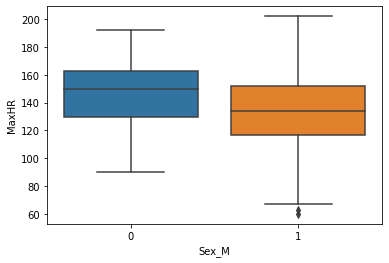

In [38]:
sns.boxplot(x=data['Sex_M'], y=data['MaxHR'])

___Conclusión:__ La media de frecuencia cardiaca de las mujeres es más alta que la de los hombres. Además, el rango de valores de MaxHR es más amplio en el grupo de hombres que en el de mujeres._
<br>
<br>

#### __¿Tienen algo que ver los distintos dolores de pecho con los niveles de colesterol?__

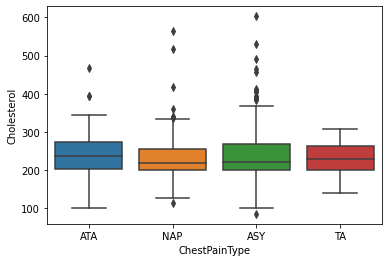

In [39]:
#Utilizamos el dataset original, ya que este no tiene encoding
rawdata["Cholesterol"]=rawdata["Cholesterol"].replace(0,rawdata["Cholesterol"].mean())
sns.boxplot(x=rawdata['ChestPainType'], y=rawdata['Cholesterol'])

___Conclusión:__ Se puede observar que la media de colesterol del grupo ATA es levemente mayor que los demás grupos. También, el grupo TA tiene un rango de valores de colesterol más reducido que los demás grupos. A priori, parece no haber una relación significativa._

**ChestPainType**: *chest pain type* - [TA: Typical} Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]<br>
<br>

#### __¿Se puede observar algun tipo de inclinación, en cuanto a mayores niveles de frecuencia cardíaca, en relación con anomalías en electrogardiogramas?__

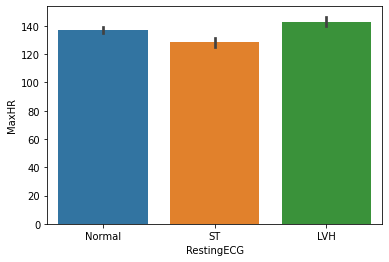

In [40]:
#Utilizamos el dataset original, ya que este no tiene encoding
sns.barplot(x='RestingECG', y='MaxHR', data=rawdata)

___Conclusión:__ Se observa una leve diferencia en altos niveles de frecuencia cardiaca en relacion con hipertrofia en el ventriculo izquierdo_
**RestingECG**: *resting electrocardiogram results* - [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
<br>
<br>

 <h2 style="color:orange"> <u>Seleccion de algoritmos candidatos</u> </h2>

## KNN  K - NEAREST - NEIGHBORS

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import numpy as np

In [42]:
data2 = data.copy()

**Paso 1:** Chequeo las columnas a usar en el modelo

In [43]:
data.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ST_Slope_Flat', 'ST_Slope_Up', 'ExerciseA_Y', 'Sex_M'],
      dtype='object')

**Paso 2:** Importo el modelo y spliteo mi data set en train y test, en este caso 80% para test, 20% para probar el target

In [44]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics
X = np.array(data[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ST_Slope_Flat', 'ST_Slope_Up', 'ExerciseA_Y', 'Sex_M']])
y = data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)


**Paso 3:** Entreno el modelo con el metodo fit, a partir del split destinado al train.

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**Paso 4:** Realizo predicciones con el modelo entrenado, y evaluo la efectividad de la predicción

In [46]:
knn.score(X_train, y_train)

0.8119891008174387

**Paso 5:** Evaluamos ahora el modelo pero con los datos de test.

In [47]:
knn.score(X_test, y_test)

0.6141304347826086

* A partir de los resultados obtenidos realizamos la consulta de probabilidades de acierto de estas predicciones
* Se observa que las mismas son demasiado equitativas por lo que las predicciones no serían del todo fiables, es decir que , las probabilidades que a en funcion de todas las variables se determine que una persona pueda o no tener un HeartDisease son demasiado bajas.

In [48]:
#Calculamos las métricas del modelo

from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve, accuracy_score
y_test_pred1 = knn.predict(X_test)
y_test_prob1 = knn.predict_proba(X_test)

auc = roc_auc_score(y_test_pred1, y_test_prob1[:, 1])
test_accuracy = accuracy_score(y_test, y_test_pred1)
print("Precision: ", round(precision_score(y_test, y_test_pred1), 2))
print("   Recall: ", round(recall_score(y_test,y_test_pred1), 2)) 
print("  F-Score: ", round(f1_score(y_test,y_test_pred1), 2))
print("      AUC: ", round(auc, 2))
print(" Accuracy: ", round(test_accuracy,2))

Precision:  0.63
   Recall:  0.72
  F-Score:  0.67
      AUC:  1.0
 Accuracy:  0.61


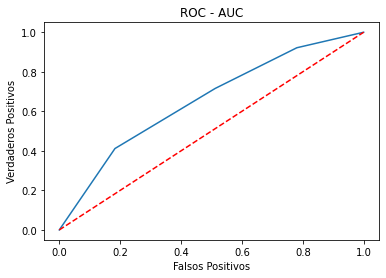

In [49]:
# Trazamos CURVA ROC-AUC
fpr, tpr, thrs = roc_curve (y_test, y_test_prob1[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], "r--")
plt.title("ROC - AUC")
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.show()

## RANDOM FOREST

**Paso 1**: Importo Randomforest y separo train y test

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [51]:
X=data.drop(['HeartDisease'],axis=1)
y=data['HeartDisease']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Paso 2**: Configuro Random Forest  

In [53]:
random_forest_m = RandomForestClassifier(random_state=42, n_estimators=150,class_weight="balanced", max_features="log2")
random_forest_m.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=150, random_state=42)

In [80]:
y_test_pred5 = random_forest_m.predict(X_test)
y_test_prob5 = random_forest_m.predict_proba(X_test)

**Paso 3**: Obtengo la accuracy y matriz de confusion y otros datos

In [81]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve
auc = roc_auc_score(y_test_pred5, y_test_prob5[:, 1])
test_accuracy = accuracy_score(y_test, y_test_pred5)
print("Precision: ", round(precision_score(y_test, y_test_pred5), 2))
print("   Recall: ", round(recall_score(y_test,y_test_pred5), 2)) 
print("  F-Score: ", round(f1_score(y_test,y_test_pred5), 2))
print("      AUC: ", round(auc, 2))
print(" Accuracy: ", round(test_accuracy,2))

Precision:  0.89
   Recall:  0.88
  F-Score:  0.89
      AUC:  1.0
 Accuracy:  0.87


In [56]:
from sklearn.tree import export_graphviz, plot_tree

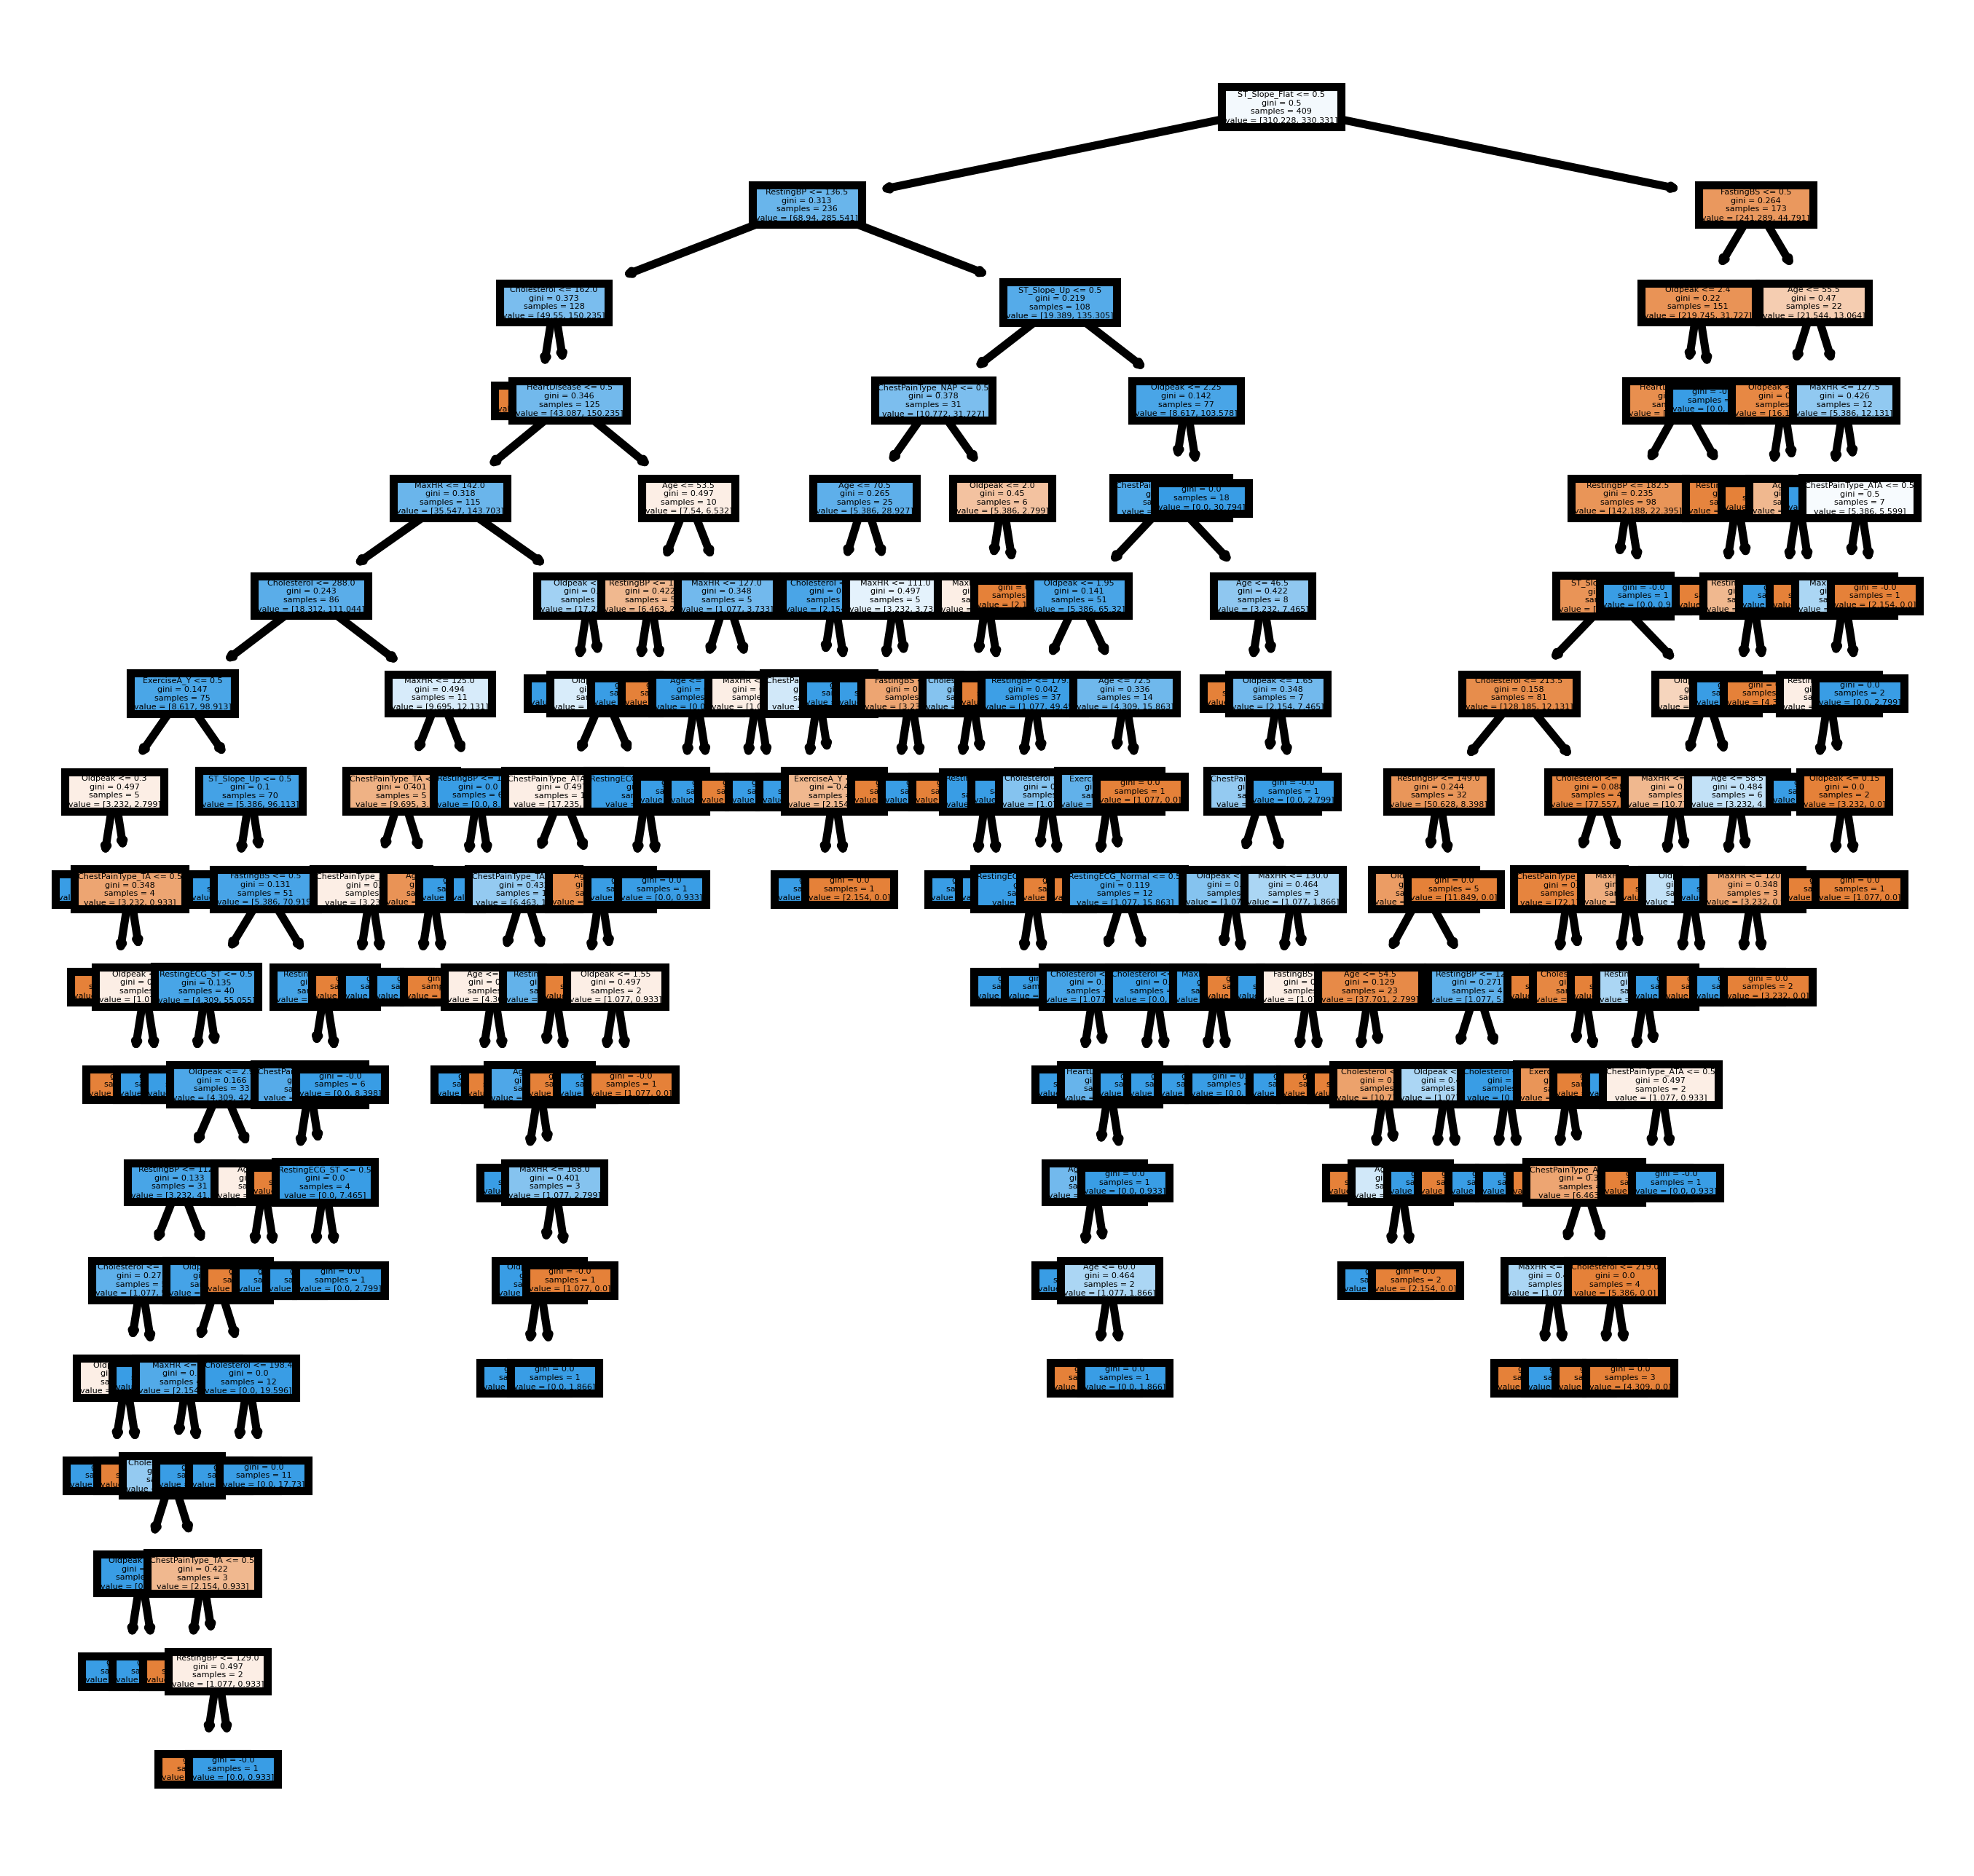

In [57]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
plot_tree(random_forest_m.estimators_[0],
               feature_names = data.columns, 
                              filled = True);
fig.savefig('rf_individualtree.png')

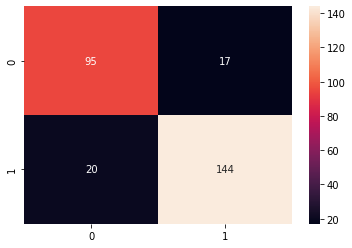

In [101]:
sns.heatmap(confusion_matrix(y_test, y_test_pred5),annot=True, fmt='d')

## GRID SEARCH CV CON LOGISTIC REGRESSION Y KNN

In [59]:
## Importamos librerías para correr el gridsearchcv 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [60]:
## Creamos tuberías para usar como parametro " estimator " en GridSearchCV para iterar los modelos logistic y knn
pipe = Pipeline([("classifier", KNeighborsClassifier())])

In [61]:

# Creamos variable que contenga el classifier y sus hiperparametros, para que a través del pipeline podamos 
# aplicar gridseearch en el parametro " param_grid "
mod_hiperparam =[
  {"classifier" :[LogisticRegression(max_iter=1000)],
   "classifier__penalty" : ["l2"],
   "classifier__max_iter" : [500, 1000]},

  {"classifier" : [KNeighborsClassifier()],
   "classifier__n_neighbors" : [4,5,6,7,8,9,10],
   "classifier__leaf_size"  :  [1,3,5,30],
   "classifier__algorithm" : ["auto", "kd_tree"]}]

In [62]:
#Creamos un clasificador con GridSearchCV

clf = GridSearchCV(pipe, mod_hiperparam, cv=5, verbose=3, n_jobs=4, error_score="raise")


In [63]:
# Previo a la aplicación del GridseachCV procedemos a estandarizar los datos para que no haya problemas
# con la convergencia de algunos modelos (como por ejemplo el de regresion logistica)

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

In [64]:
X_train = scaler.transform(X_train)
X_train

array([[ 0.46471433, -1.85899627, -0.0609966 , ...,  1.15890711,
        -0.83034552,  0.54494926],
       [ 0.78176703, -1.29876842, -0.70950729, ..., -0.86288193,
         1.20431793,  0.54494926],
       [-0.06370685,  1.50237084, -0.70950729, ..., -0.86288193,
         1.20431793,  0.54494926],
       ...,
       [ 0.6760828 , -0.17831272,  0.28904745, ...,  1.15890711,
         1.20431793,  0.54494926],
       [ 0.6760828 ,  1.05418856, -0.70950729, ...,  1.15890711,
         1.20431793,  0.54494926],
       [-1.43760192,  0.94214299,  2.84989601, ..., -0.86288193,
        -0.83034552, -1.83503323]])

In [65]:
#Buscamos ahora el mejor de ambos modelos junto a los hiperparametros que mejor se ajusten
best_model = clf.fit(X_train, y_train)
print(best_model.best_estimator_.get_params()["classifier"])

Fitting 5 folds for each of 58 candidates, totalling 290 fits
KNeighborsClassifier(leaf_size=1, n_neighbors=8)


In [82]:
# Predecir resultados en el conjunto de evaluación
y_test_pred6 = best_model.predict(X_test)
y_test_prob6 = best_model.predict_proba(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [83]:
# Importamos y calculamos las métricas del modelo elegido por GridSearchCV

from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve
auc = roc_auc_score(y_test_pred6, y_test_prob6[:, 1])
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Precision: ", round(precision_score(y_test, y_test_pred6), 2))
print("   Recall: ", round(recall_score(y_test,y_test_pred6), 2)) 
print("  F-Score: ", round(f1_score(y_test,y_test_pred6), 2))
print("      AUC: ", round(auc, 2))
print(" Accuracy: ", round(test_accuracy,2))

Precision:  0.68
   Recall:  0.88
  F-Score:  0.77
      AUC:  1.0
 Accuracy:  0.68


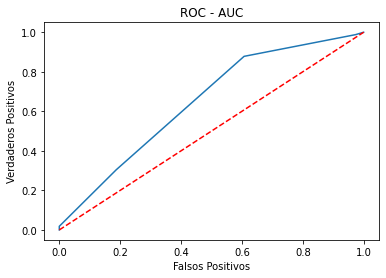

In [68]:
# curva AUC
fpr, tpr, thrs = roc_curve (y_test, y_test_prob[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], "r--")
plt.title("ROC - AUC")
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.show()

## GRIDSEARCHCV PARA HIPER PARAMETROS DE RANDOM FOREST

In [91]:
# Cargamos los parametros sobre los que el modelo deberá seleccionar los más factibles
param_grid = {"max_depth": [3, 5, 6, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [1.0, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "n_estimators": [10, 20, 30, 40, 50]}

In [92]:
# Cargamos modelo random forest classifier
rf_model = RandomForestClassifier()

In [93]:
# Hacemos uso del GridSeachCV tomando como parametros a evaluar param_grid
from time import time
rf_grid = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 3, verbose = 3, n_jobs = 4)
start = time()

In [94]:
# Procedemos al entrenamiento del modelo, con la finalidad de que haga cross validation y a su vez determine los hiperparametros mas viables
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 2160 candidates, totalling 6480 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 6, None],
                         'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [1.0, 3, 10],
                         'n_estimators': [10, 20, 30, 40, 50]},
             verbose=3)

In [95]:
# Solicitamos a través del atributo best_params_ los resultados del gridsearch con los hiperparametros que mejor combinan con el modelo
rf_grid.best_params_ 

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 30}

In [96]:
# Observamos el tiempo en segundos que tarda en ejecutarse el modelo
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(rf_grid.cv_results_)))


GridSearchCV took 531.44 seconds for 18 candidate parameter settings.


In [97]:
# Imprimimos en pantalla las métricas del modelo con la elección de los mejores hiperparametros
print(f"Train Accuracy - : {rf_grid.score(X_train, y_train):.3f}")
print(f"Test Accuracy - : {rf_grid.score(X_test, y_test):.3f}")

Train Accuracy - : 0.907
Test Accuracy - : 0.815


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [98]:
# Predecir resultados en el conjunto de evaluación
y_test_pred3 =rf_grid.predict(X_test)
y_test_prob3 = rf_grid.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [99]:

from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve
auc = roc_auc_score(y_test_pred3, y_test_prob3[:, 1])
test_accuracy = accuracy_score(y_test, y_test_pred3)
print("Precision: ", round(precision_score(y_test, y_test_pred3), 2))
print("   Recall: ", round(recall_score(y_test,y_test_pred3), 2)) 
print("  F-Score: ", round(f1_score(y_test,y_test_pred3), 2))
print("      AUC: ", round(auc, 2))
print(" Accuracy: ", round(test_accuracy,2))

Precision:  0.8
   Recall:  0.91
  F-Score:  0.85
      AUC:  1.0
 Accuracy:  0.82


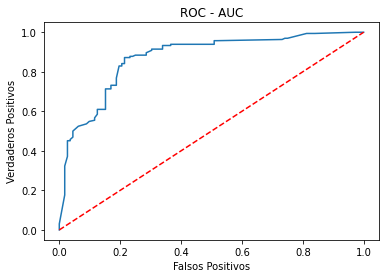

In [100]:
# curva AUC
fpr, tpr, thrs = roc_curve (y_test, y_test_prob3[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], "r--")
plt.title("ROC - AUC")
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.show()